In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import acquire
from prepare import train_val_test
np.random.seed(123)


In [2]:
taxis = sns.load_dataset('taxis')

In [3]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [4]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [6]:
taxis.payment.value_counts()

credit card    4577
cash           1812
Name: payment, dtype: int64

In [7]:
taxis.color.value_counts()

yellow    5451
green      982
Name: color, dtype: int64

In [9]:
taxis.describe().T

,count,mean,std,min,25%,50%,75%,max
passengers,6433.0,1.539251,1.203768,0.0,1.00,1.00,2.00,6.00
distance,6433.0,3.024617,3.827867,0.0,0.98,1.64,3.21,36.70
fare,6433.0,13.091073,11.551804,1.0,6.50,9.50,15.00,150.00
tip,6433.0,1.979220,2.448560,0.0,0.00,1.70,2.80,33.20
tolls,6433.0,0.325273,1.415267,0.0,0.00,0.00,0.00,24.02
total,6433.0,18.517794,13.815570,1.3,10.80,14.16,20.30,174.82


In [12]:
taxis = taxis.drop(columns = ['pickup', 'dropoff', 'pickup_zone', 'dropoff_zone'], axis=1)

In [13]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passengers       6433 non-null   int64  
 1   distance         6433 non-null   float64
 2   fare             6433 non-null   float64
 3   tip              6433 non-null   float64
 4   tolls            6433 non-null   float64
 5   total            6433 non-null   float64
 6   color            6433 non-null   object 
 7   payment          6389 non-null   object 
 8   pickup_borough   6407 non-null   object 
 9   dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 502.7+ KB


In [15]:
taxis.isnull().sum()

passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_borough     26
dropoff_borough    45
dtype: int64

In [17]:
taxis = taxis.dropna()

In [18]:
taxis.isnull().sum()

passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [19]:
dummies_df = pd.get_dummies(taxis[['color', 'payment', 'pickup_borough', 'dropoff_borough']], drop_first=True)

In [21]:
taxis = pd.concat([taxis, dummies_df], axis=1)

In [22]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6341 entries, 0 to 6432
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   passengers                     6341 non-null   int64  
 1   distance                       6341 non-null   float64
 2   fare                           6341 non-null   float64
 3   tip                            6341 non-null   float64
 4   tolls                          6341 non-null   float64
 5   total                          6341 non-null   float64
 6   color                          6341 non-null   object 
 7   payment                        6341 non-null   object 
 8   pickup_borough                 6341 non-null   object 
 9   dropoff_borough                6341 non-null   object 
 10  color_yellow                   6341 non-null   uint8  
 11  payment_credit card            6341 non-null   uint8  
 12  pickup_borough_Brooklyn        6341 non-null   u

In [53]:
taxis = taxis.rename(columns = {'payment_credit card':'payment_credit_card',
                    'dropoff_borough_Staten Island': 'dropoff_borough_Staten_Island'}
                    )

In [55]:
num_vars = taxis.select_dtypes(include = ['int64', 'float64'])

In [56]:
cat_vars = taxis.select_dtypes(include= ['object', 'uint8'])

In [57]:
col = 'passengers'
train, validate, test = train_val_test(taxis, col)

In [58]:
train.shape, validate.shape, test.shape

((4438, 19), (951, 19), (952, 19))

color
yellow    3754
green      684
Name: color, dtype: int64
yellow    84.587652
green     15.412348
Name: color, dtype: float64


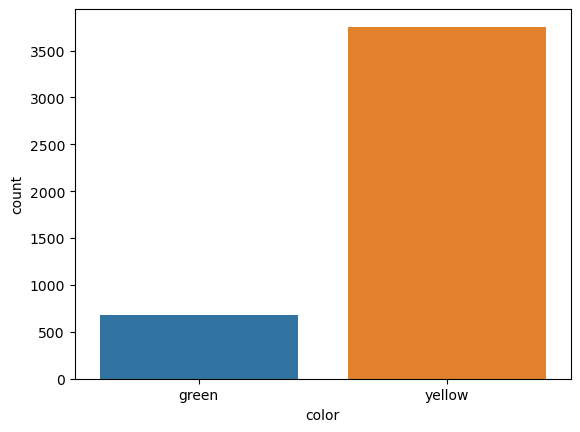

payment
credit card    3158
cash           1280
Name: payment, dtype: int64
credit card    71.158179
cash           28.841821
Name: payment, dtype: float64


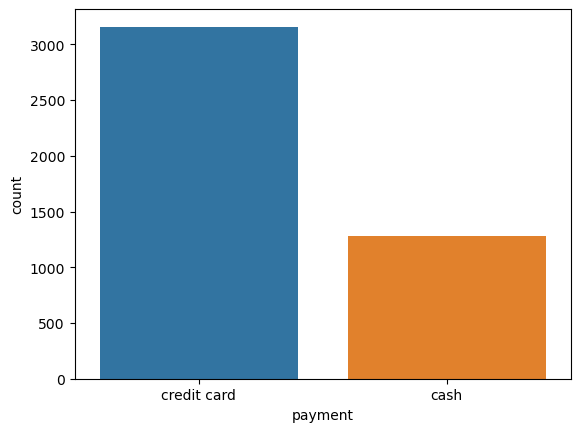

pickup_borough
Manhattan    3635
Queens        462
Brooklyn      266
Bronx          75
Name: pickup_borough, dtype: int64
Manhattan    81.906264
Queens       10.410095
Brooklyn      5.993691
Bronx         1.689950
Name: pickup_borough, dtype: float64


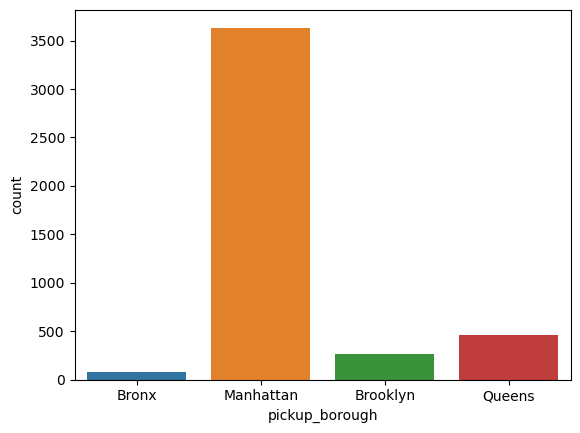

dropoff_borough
Manhattan        3614
Queens            370
Brooklyn          350
Bronx             102
Staten Island       2
Name: dropoff_borough, dtype: int64
Manhattan        81.433078
Queens            8.337089
Brooklyn          7.886435
Bronx             2.298333
Staten Island     0.045065
Name: dropoff_borough, dtype: float64


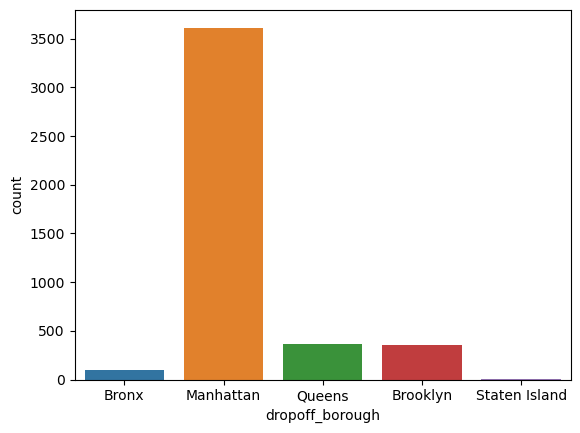

color_yellow
1    3754
0     684
Name: color_yellow, dtype: int64
1    84.587652
0    15.412348
Name: color_yellow, dtype: float64


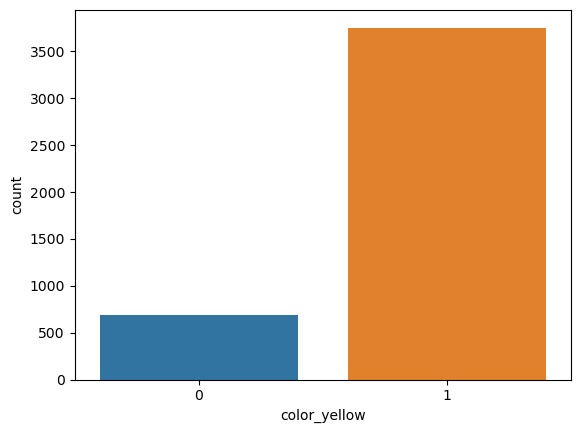

payment_credit_card
1    3158
0    1280
Name: payment_credit_card, dtype: int64
1    71.158179
0    28.841821
Name: payment_credit_card, dtype: float64


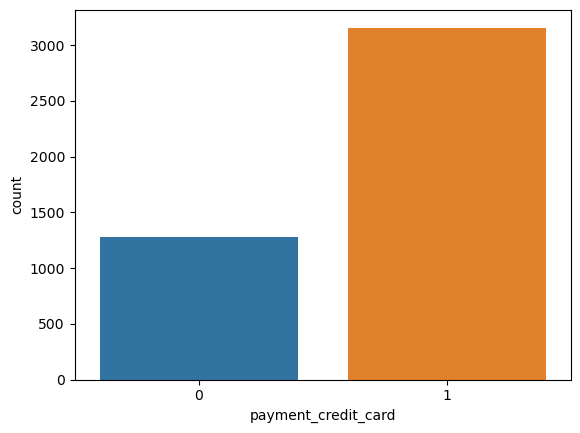

pickup_borough_Brooklyn
0    4172
1     266
Name: pickup_borough_Brooklyn, dtype: int64
0    94.006309
1     5.993691
Name: pickup_borough_Brooklyn, dtype: float64


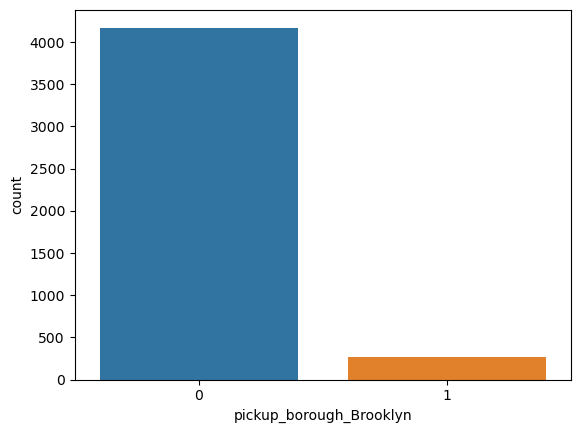

pickup_borough_Manhattan
1    3635
0     803
Name: pickup_borough_Manhattan, dtype: int64
1    81.906264
0    18.093736
Name: pickup_borough_Manhattan, dtype: float64


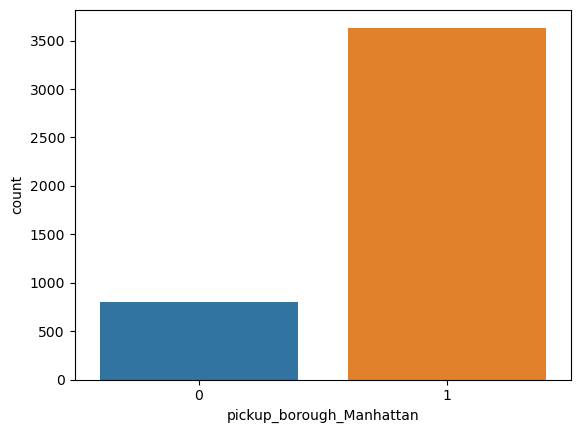

pickup_borough_Queens
0    3976
1     462
Name: pickup_borough_Queens, dtype: int64
0    89.589905
1    10.410095
Name: pickup_borough_Queens, dtype: float64


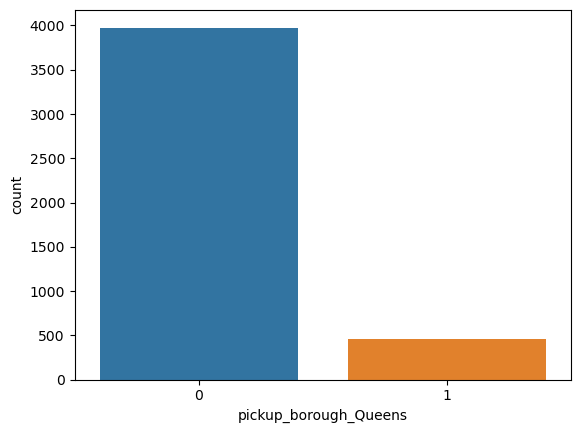

dropoff_borough_Brooklyn
0    4088
1     350
Name: dropoff_borough_Brooklyn, dtype: int64
0    92.113565
1     7.886435
Name: dropoff_borough_Brooklyn, dtype: float64


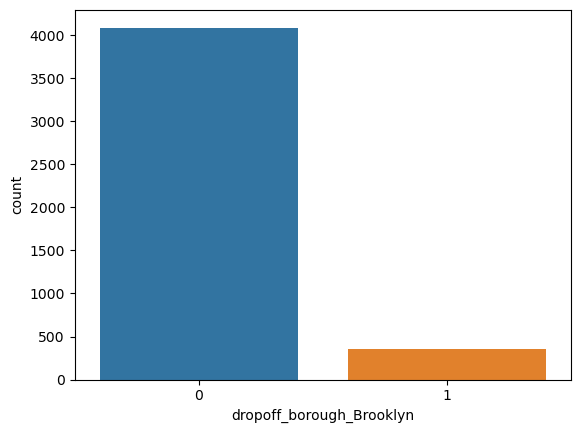

dropoff_borough_Manhattan
1    3614
0     824
Name: dropoff_borough_Manhattan, dtype: int64
1    81.433078
0    18.566922
Name: dropoff_borough_Manhattan, dtype: float64


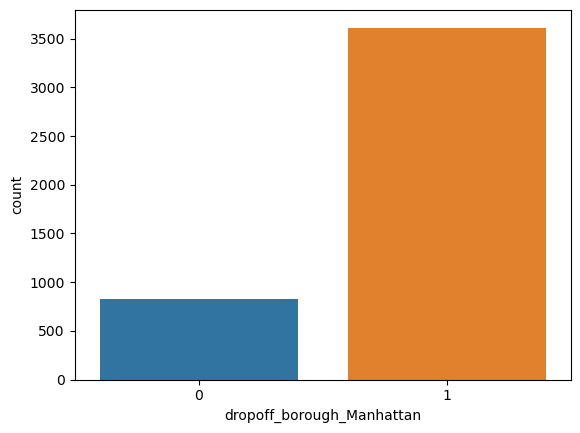

dropoff_borough_Queens
0    4068
1     370
Name: dropoff_borough_Queens, dtype: int64
0    91.662911
1     8.337089
Name: dropoff_borough_Queens, dtype: float64


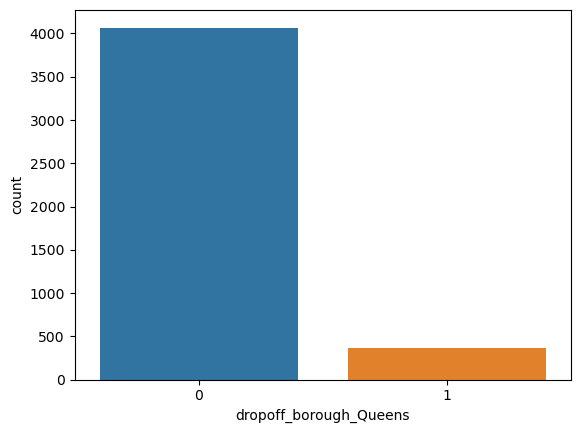

dropoff_borough_Staten_Island
0    4436
1       2
Name: dropoff_borough_Staten_Island, dtype: int64
0    99.954935
1     0.045065
Name: dropoff_borough_Staten_Island, dtype: float64


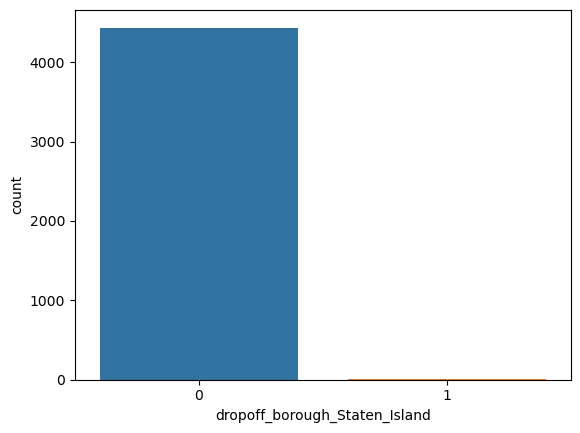

In [59]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize = True) * 100)
    sns.countplot(x=col, data = train)
    plt.show()

passengers


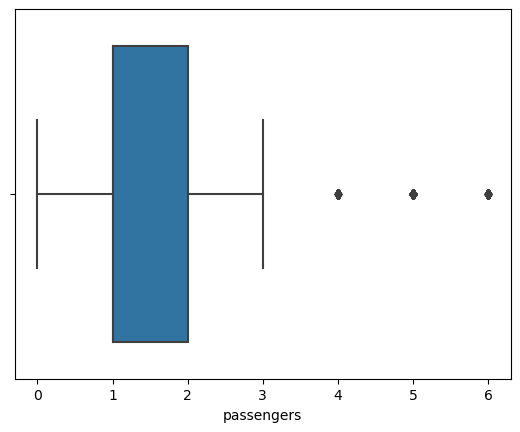

distance


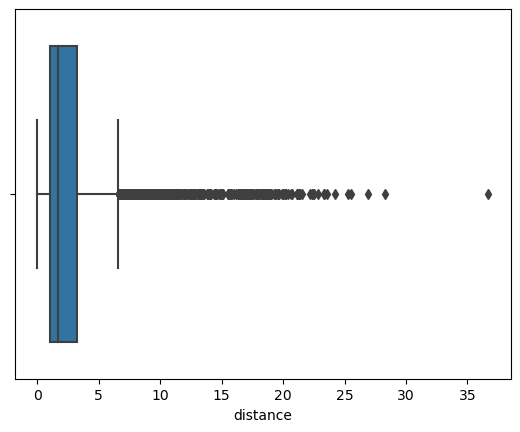

fare


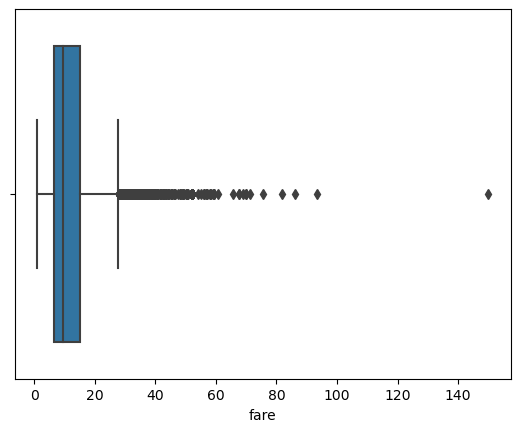

tip


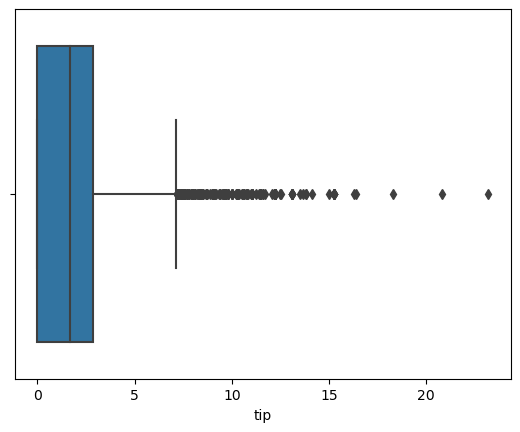

tolls


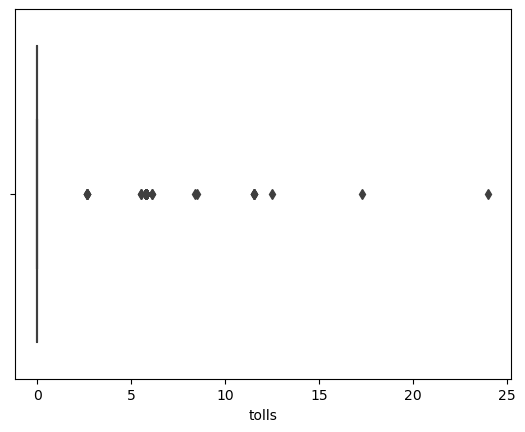

total


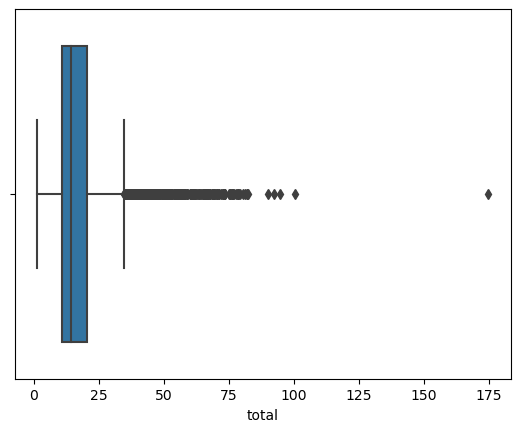

In [60]:
for col in num_vars:
    print(col)
    sns.boxplot(x=col, data = train)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


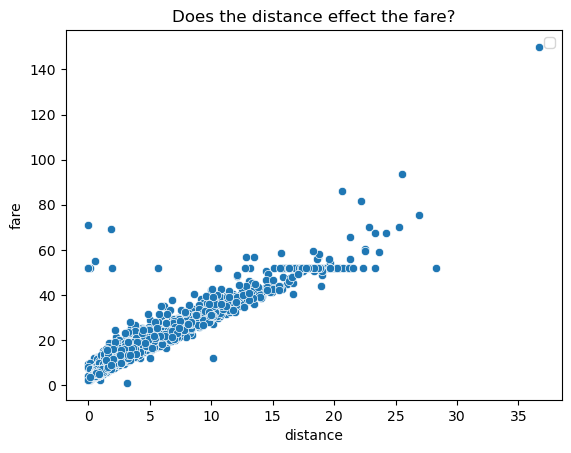

In [61]:
plt.title('Does the distance effect the fare?')
sns.scatterplot(x= 'distance', y = 'fare', data = train)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


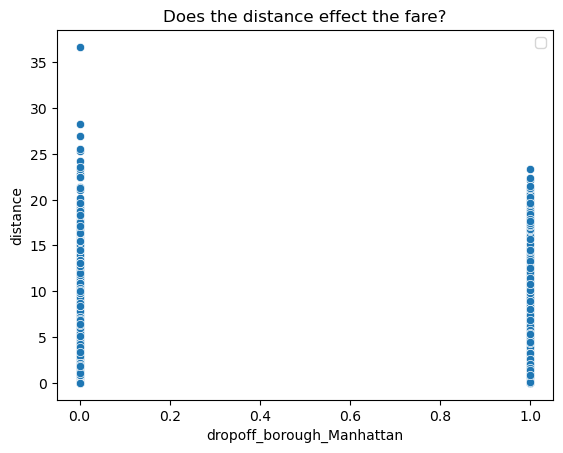

In [62]:
plt.title('Does the distance effect the fare?')
sns.scatterplot(x= 'dropoff_borough_Manhattan', y = 'distance', data = train)
plt.legend()

In [63]:
taxis.columns

Index(['passengers', 'distance', 'fare', 'tip', 'tolls', 'total', 'color',
       'payment', 'pickup_borough', 'dropoff_borough', 'color_yellow',
       'payment_credit_card', 'pickup_borough_Brooklyn',
       'pickup_borough_Manhattan', 'pickup_borough_Queens',
       'dropoff_borough_Brooklyn', 'dropoff_borough_Manhattan',
       'dropoff_borough_Queens', 'dropoff_borough_Staten_Island'],
      dtype='object')

<AxesSubplot:xlabel='passengers', ylabel='fare'>

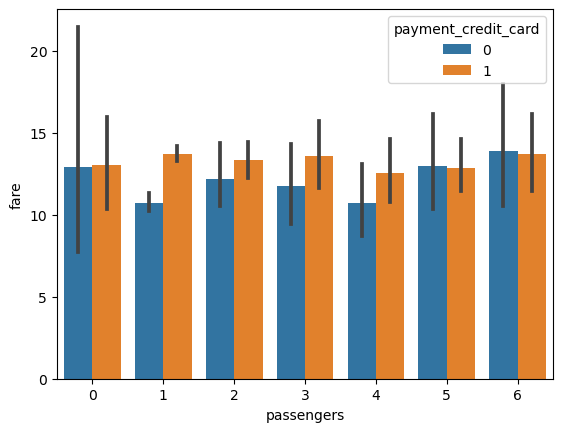

In [64]:
sns.barplot(x = 'passengers', y = 'fare', data = train, hue = 'payment_credit_card')

<AxesSubplot:xlabel='passengers', ylabel='tip'>

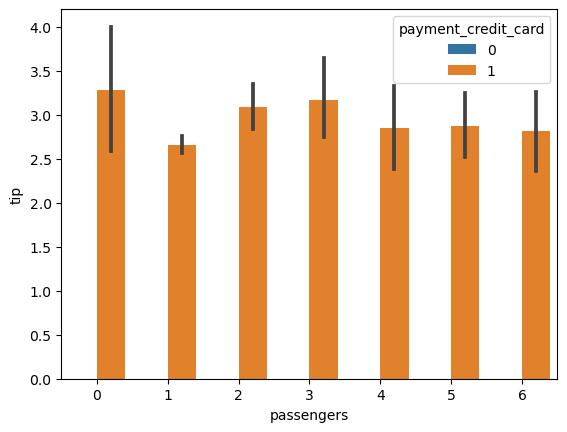

In [65]:
sns.barplot(x = 'passengers', y = 'tip', data = train, hue = 'payment_credit_card')